# Downloded the necessary packages for text preprocessing

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
!pip install langdetect

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ovi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ovi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ovi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ovi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Imported the packages

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import string
from langdetect import detect
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Defining the path of the project

In [3]:
PATH = "F:\\Ml files\\Emotion detection\\Data\\"

# Read the collected dataset

In [4]:
df = pd.read_csv(PATH+"English/ISEAR/eng_dataset.csv",usecols=['sentiment','content'])
df.head(5)

,sentiment,content
0,anger,At the point today where if someone says somet...
1,anger,@CorningFootball IT'S GAME DAY!!!! T MIN...
2,anger,This game has pissed me off more than any othe...
3,anger,@spamvicious I've just found out it's Candice ...
4,anger,@moocowward @mrsajhargreaves @Melly77 @GaryBar...


# Number of texts in the dataset
It can be seen there's 7102 texts labeled into joy, anger, sadness, fear, surprise

In [5]:
df.sentiment.value_counts()

fear       2252
anger      1701
joy        1616
sadness    1533
Name: sentiment, dtype: int64

In [6]:
print('Dataset size:',df.shape)
print('Columns are:',df.columns)

Dataset size: (7102, 2)
Columns are: Index(['sentiment', 'content'], dtype='object')


# Countplot to see the destribution of classes

<AxesSubplot:xlabel='sentiment', ylabel='count'>

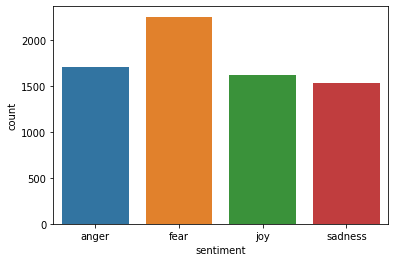

In [7]:
sns.countplot(x = 'sentiment', data = df)

# Text Preprocessing

## Basic Cleaning

In [8]:
tagging_regex = re.compile(r"@\S*")
url_pattern = re.compile(r'https?://\S+|www\.\S+')
weird_thing_pattern = re.compile(r"\^\S*")
new_line_pattern = re.compile(r"\n+\S*")

chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My Ass Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait",
    "IMMA": "I am going to",
    "2NITE": "tonight",
    "DMED": "mesaged",
    'DM': "message",
    "SMH": "I am dissapointed"
}

contractions = {
    "ain't": "are not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he shall have / he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "I would",
    "i'd've": "I would have",
    "i'll": "I will",
    "i'll've": "I will have",
    "i'm": "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have",
}

In [9]:
# Remove emojis from the text
def remove_emoji(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')


# Remove url from the text
def remove_url(string):
    return url_pattern.sub(r'', string)

# expend chat words and contractions from the text
def remove_chat_words_and_contractions(string):
    new_text = []
    for word in string.split(' '):
        if word.upper() in chat_words.keys():
            new_text += chat_words[word.upper()].lower().split(' ')
        if word.lower() in contractions.keys():
            new_text += contractions[word.lower()].split(' ')
        else:
            new_text.append(word)      
    return ' '.join(new_text) 

# Remove punctuations from the text
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [11]:
def clean_message(message):
    # Remove user taggings
    message = re.sub(tagging_regex, '', message)
    
    # Remove the emojis
    message = remove_emoji(message)
    
    # Remove urls
    message = remove_url(message)
    
    
    # Remove the chat words and contractions
    message = remove_chat_words_and_contractions(message)
    
    # Remove weird things
    message = weird_thing_pattern.sub(r'', message)

    # Change new line to dot
    message = new_line_pattern.sub(r'', message)
    
    # Remove punctuation
    message = remove_punctuation(message)
    
    # Remove start and end whitespace
    message = message.strip()
    
    # Make multiple spaces become a single space
    message = ' '.join(message.split())
    
    # Lower case the message
    message = message.lower()
    
    return message

df['cleaned_text'] = df.apply(lambda row: clean_message(row['content']), axis=1)

In [12]:
print("before cleaning texts")
print(df.content[1])
print("After cleaning texts")
print(df.cleaned_text[1])

before cleaning texts
@CorningFootball  IT'S GAME DAY!!!!      T MINUS 14:30  #relentless
After cleaning texts
it is game day t minus 1430 relentless


In [13]:
# # Remove numbers from the text
def remove_numbers(text):
    text = re.sub('[0-9]+', '', text)
    return text

df['cleaned_text'] = df['cleaned_text'].apply(lambda x: remove_numbers(x))

# Stop words removal

In [14]:
stop_words = stopwords.words('english')

# Remove stop words
df['cleaned_text'] = df['cleaned_text'].str.split().apply(lambda x: [word for word in x if word not in stop_words]).apply(lambda x: ' '.join(x))

In [16]:
print("before removieing stopwords: ",df['content'][1])
print("After removieing stopwords: ",df['cleaned_text'][1])

before removieing stopwords:  @CorningFootball  IT'S GAME DAY!!!!      T MINUS 14:30  #relentless
After removieing stopwords:  game day minus relentless


## Removing rare words

In [17]:
#rare words
n_rare_words = 10
cnt = Counter()
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["cleaned_text"] = df["cleaned_text"].apply(lambda text: remove_rarewords(text))

## Lemmatization

In [18]:
print("Before lemmatization : ",df['cleaned_text'][1])

Before lemmatization :  game day minus relentless


In [19]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["cleaned_text"] = df["cleaned_text"].apply(lambda text: lemmatize_words(text))

print("After lemmatization : ",df['cleaned_text'][1])

After lemmatization :  game day minus relentless


# Word cloud generation

Text(0.5, 1.0, 'Texts under Fear Class')

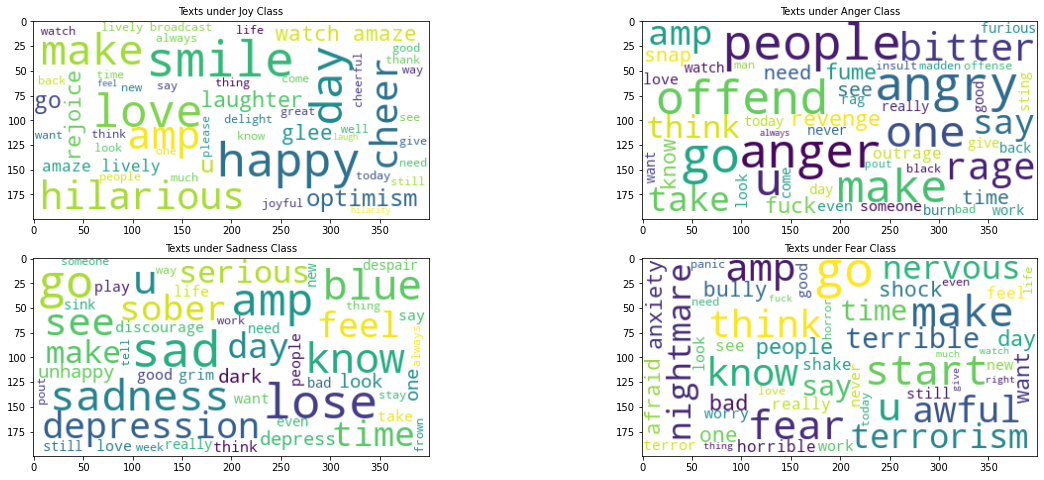

In [22]:
tweet_df = df.copy()
# Start with one review:
df_joy = tweet_df[tweet_df['sentiment']=='joy']
df_anger = tweet_df[tweet_df['sentiment']=='anger']
df_sadness = tweet_df[tweet_df['sentiment']=='sadness']
df_fear = tweet_df[tweet_df['sentiment']=='fear']


tweet_joy = " ".join(review for review in df_joy.cleaned_text)
tweet_anger = " ".join(review for review in df_anger.cleaned_text)
tweet_sadness = " ".join(review for review in df_sadness.cleaned_text)
tweet_fear = " ".join(review for review in df_fear.cleaned_text)

fig, ax = plt.subplots(2, 2, figsize  = (20,8))
# Create and generate a word cloud image:
wordcloud_joy = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(tweet_joy)
wordcloud_anger = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(tweet_anger)
wordcloud_sadness = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(tweet_sadness)
wordcloud_fear = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(tweet_fear)

# Display the generated image:
ax[0][0].imshow(wordcloud_joy, interpolation='bilinear')
ax[0][0].set_title('Texts under Joy Class', fontsize=10)
ax[0][1].imshow(wordcloud_anger, interpolation='bilinear')
ax[0][1].set_title('Texts under Anger Class',fontsize=10)
ax[1][0].imshow(wordcloud_sadness, interpolation='bilinear')
ax[1][0].set_title('Texts under Sadness Class',fontsize=10)
ax[1][1].imshow(wordcloud_fear, interpolation='bilinear')
ax[1][1].set_title('Texts under Fear Class',fontsize=10)


# Saving the cleaned dataset

In [23]:
df.to_csv(PATH+"English/ISEAR/Cleaned_ENG_EMOTIONS.csv",index=False)